## **Logistic Regression**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

For Example: spam detection for emails, predicting if a customer will default in a loan, etc.


<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png">

## **Geting Started with Logistic Regression**

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## **Data Framing**

Read .csv data into a Dataframe

In [2]:
#reading our dataset in Alias: data.
data = pd.read_csv("titanic.csv")

#Overviewing our dataset
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## **Exploring Dataset**

In [3]:
data = data[["pclass","sex","age","survived"]]

In [4]:
data.shape

(1310, 4)

In [6]:
#Describing our dataset
data.describe()

,pclass,age,survived
count,1309.000000,1046.000000,1309.000000
mean,2.294882,29.881135,0.381971
std,0.837836,14.413500,0.486055
min,1.000000,0.166700,0.000000
25%,2.000000,21.000000,0.000000
50%,3.000000,28.000000,0.000000
75%,3.000000,39.000000,1.000000
max,3.000000,80.000000,1.000000


In [7]:
#Printing top 5 rows
data.head()


,pclass,sex,age,survived
0,1.0,female,29.0000,1.0
1,1.0,male,0.9167,1.0
2,1.0,female,2.0000,0.0
3,1.0,male,30.0000,0.0
4,1.0,female,25.0000,0.0


In [8]:
#Printing last 5 rows
data.tail()

,pclass,sex,age,survived
1305,3.0,female,NaN,0.0
1306,3.0,male,26.5,0.0
1307,3.0,male,27.0,0.0
1308,3.0,male,29.0,0.0
1309,NaN,NaN,NaN,NaN


In [9]:
#Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis = 0))

# data.isna().sum(axis = 0)   # Nan values in every column
# data.isna().sum(axis = 1)   # Nan values in every row.

pclass        1
sex           1
age         264
survived      1
dtype: int64


## **Preprocessing: Dealing with Missing Values**

In [10]:
#Dropping Rows with Nan in all provided columns
data = data.dropna(subset=["sex","pclass","survived"])

In [11]:
#Again Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis = 0))

pclass        0
sex           0
age         263
survived      0
dtype: int64


In [12]:
data.tail()

,pclass,sex,age,survived
1304,3.0,female,14.5,0.0
1305,3.0,female,NaN,0.0
1306,3.0,male,26.5,0.0
1307,3.0,male,27.0,0.0
1308,3.0,male,29.0,0.0


## **Preprocessing: Label Encoding**

Since in **sex** column we are not having a numerical vallue, just having male and female. Since, model doesn't accept text, wo we will transform text into binary labels.

In [13]:
data["sex"] = data["sex"].map({"male":1,"female":0})

data["sex"]

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int64

In [14]:
data.head()

,pclass,sex,age,survived
0,1.0,0,29.0000,1.0
1,1.0,1,0.9167,1.0
2,1.0,0,2.0000,0.0
3,1.0,1,30.0000,0.0
4,1.0,0,25.0000,0.0


In [15]:
data.describe()

,pclass,sex,age,survived
count,1309.000000,1309.000000,1046.000000,1309.000000
mean,2.294882,0.644003,29.881135,0.381971
std,0.837836,0.478997,14.413500,0.486055
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,21.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000
max,3.000000,1.000000,80.000000,1.000000


## **Features Extraction**

Extracting features

In [17]:
features = data[["sex","age","pclass"]]  # X
target = data[["survived"]]   # y
features.head()

,sex,age,pclass
0,0,29.0000,1.0
1,1,0.9167,1.0
2,0,2.0000,1.0
3,1,30.0000,1.0
4,0,25.0000,1.0


In [18]:
target.head()

,survived
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


## **Preprocessing: Imputation | Missing Values in Age**

Now since we are having so many missing values in our column of **age** we will Impute the entire column

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features = imputer.fit_transform(features)

In [21]:
features

array([[ 0.    , 29.    ,  1.    ],
       [ 1.    ,  0.9167,  1.    ],
       [ 0.    ,  2.    ,  1.    ],
       ...,
       [ 1.    , 26.5   ,  3.    ],
       [ 1.    , 27.    ,  3.    ],
       [ 1.    , 29.    ,  3.    ]])

## **Splitting our dataset into Train & Test Set**

In [23]:
feature_train, feature_test, target_train, target_test = train_test_split(features,target)

## **Training the Model**

We are using Logistic regression model as imported from sklearn library and then it's being trained on feature_train and target_train

In [24]:
model = LogisticRegression()
model.fit(feature_train, target_train)


predictions = model.predict(feature_test)

C:\Users\us\ana\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Printing an Error Matrix and Accuracy Score**

<img src ="https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816" height =200>

In [25]:
conf_matrix =  confusion_matrix(target_test,predictions)
print(confusion_matrix(target_test,predictions))
print("The accuracy of the above model is: ", accuracy_score(target_test,predictions))

[[173  27]
 [ 38  90]]
The accuracy of the above model is:  0.801829268292683


In [22]:
from sklearn.metrics import classification_report

# evaluate the model
print("\nClassification Report:\n", classification_report(target_test,predictions))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       195
         1.0       0.81      0.67      0.73       133

    accuracy                           0.80       328
   macro avg       0.80      0.78      0.79       328
weighted avg       0.80      0.80      0.80       328



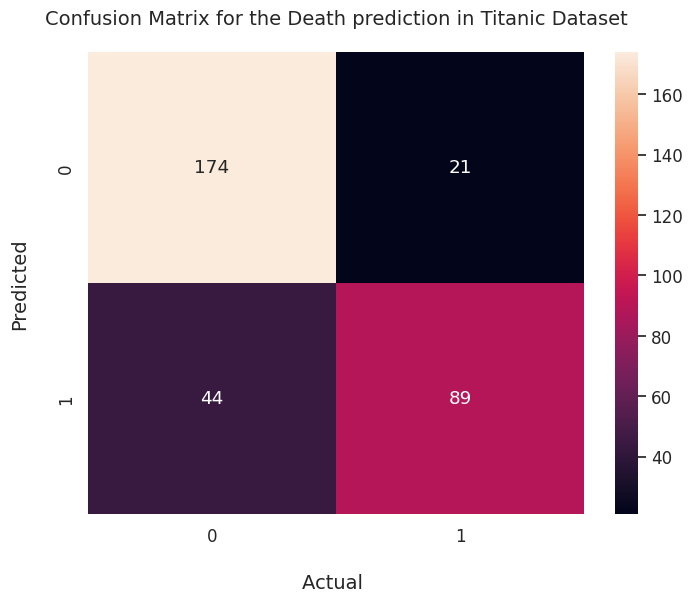

In [28]:
import seaborn as sns
 
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)
 
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
 
# set x-axis label and ticks. 
ax.set_xlabel("Actual ", fontsize=14, labelpad=20)
# ax.xaxis.set_ticklabels(['Negative', 'Positive'])
 
# set y-axis label and ticks
ax.set_ylabel("Predicted", fontsize=14, labelpad=20)
# ax.yaxis.set_ticklabels(['Negative', 'Positive'])
 
# set plot title
ax.set_title("Confusion Matrix for the Death prediction in Titanic Dataset", fontsize=14, pad=20)
 
plt.show()